In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


In [2]:
train = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv',index_col=['startdate'])
test = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv',index_col=['startdate'])
submit = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv')
target = 'contest-tmp2m-14d__tmp2m'

# Light data exploration

In [3]:
train.head()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
startdate,,,,,,,,,,,,,,,,,,,,,
9/1/14,0,0.0,0.833333,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
9/2/14,1,0.0,0.833333,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
9/3/14,2,0.0,0.833333,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
9/4/14,3,0.0,0.833333,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
9/5/14,4,0.0,0.833333,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [4]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 375734 entries, 9/1/14 to 8/31/16
Data columns (total 245 columns):
 #    Column                                    Non-Null Count   Dtype  
---   ------                                    --------------   -----  
 0    index                                     375734 non-null  int64  
 1    lat                                       375734 non-null  float64
 2    lon                                       375734 non-null  float64
 3    contest-pevpr-sfc-gauss-14d__pevpr        375734 non-null  float64
 4    nmme0-tmp2m-34w__cancm30                  375734 non-null  float64
 5    nmme0-tmp2m-34w__cancm40                  375734 non-null  float64
 6    nmme0-tmp2m-34w__ccsm30                   359800 non-null  float64
 7    nmme0-tmp2m-34w__ccsm40                   375734 non-null  float64
 8    nmme0-tmp2m-34w__cfsv20                   375734 non-null  float64
 9    nmme0-tmp2m-34w__gfdlflora0               375734 non-null  float64
 10   nmme0

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,375734.0,187866.500000,108465.207359,0.00,93933.250000,187866.500000,281799.750000,375733.00
lat,375734.0,0.592766,0.251744,0.00,0.409091,0.590909,0.818182,1.00
lon,375734.0,0.517964,0.272059,0.00,0.300000,0.533333,0.766667,1.00
contest-pevpr-sfc-gauss-14d__pevpr,375734.0,276.744064,198.085182,-2.31,104.062500,250.320000,420.010000,1185.14
nmme0-tmp2m-34w__cancm30,375734.0,10.801682,10.952417,-14.96,1.550000,9.950000,20.230000,36.08
...,...,...,...,...,...,...,...,...
wind-vwnd-925-2010-16,375734.0,-9.846867,34.164678,-106.08,-32.170000,-8.560000,10.500000,83.89
wind-vwnd-925-2010-17,375734.0,-6.231860,27.050356,-93.98,-20.170000,-6.030000,11.630000,64.85
wind-vwnd-925-2010-18,375734.0,16.014364,25.847455,-52.61,-0.360000,18.650000,31.210000,90.39
wind-vwnd-925-2010-19,375734.0,10.489945,25.070435,-66.11,-6.790000,11.860000,29.040000,76.89


In [6]:
train.index = pd.to_datetime(train.index)
train.index

DatetimeIndex(['2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04',
               '2014-09-05', '2014-09-06', '2014-09-07', '2014-09-08',
               '2014-09-09', '2014-09-10',
               ...
               '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25',
               '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29',
               '2016-08-30', '2016-08-31'],
              dtype='datetime64[ns]', name='startdate', length=375734, freq=None)

In [7]:
import math
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

train['trunc_lon'] = train['lon'].apply(lambda x: truncate(x,9))
train['trunc_lon'] = train['trunc_lon'].map('{:.9f}'.format)

train['trunc_lat'] = train['lat'].apply(lambda x: truncate(x,9))
train['trunc_lat'] = train['trunc_lat'].map('{:.9f}'.format)

In [8]:
cols = ['trunc_lon', 'trunc_lat']
train['location'] = train[cols].apply(lambda row: '_'.join(row.values.astype(object)), axis=1)

In [9]:
train['location'].describe()

count                      375734
unique                        514
top       0.833333333_0.000000000
freq                          731
Name: location, dtype: object

In [10]:
train.head()

,index,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,trunc_lon,trunc_lat,location
startdate,,,,,,,,,,,,,,,,,,,,,
2014-09-01,0,0.0,0.833333,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,0.833333333,0.000000000,0.833333333_0.000000000
2014-09-02,1,0.0,0.833333,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,0.833333333,0.000000000,0.833333333_0.000000000
2014-09-03,2,0.0,0.833333,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,32.16,5.01,48.53,19.21,-33.16,15.11,4.82,0.833333333,0.000000000,0.833333333_0.000000000
2014-09-04,3,0.0,0.833333,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74,0.833333333,0.000000000,0.833333333_0.000000000
2014-09-05,4,0.0,0.833333,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95,0.833333333,0.000000000,0.833333333_0.000000000


In [11]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(train)

Your selected dataframe has 248 columns and 375734 Rows.
There are 8 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
nmme0-tmp2m-34w__ccsm30,119,15934,4.2,16053,4.3,float64
nmme0-prate-56w__ccsm30,826,15934,4.2,16760,4.5,float64
nmme0-prate-34w__ccsm30,878,15934,4.2,16812,4.5,float64
ccsm30,119,15934,4.2,16053,4.3,float64
nmme-tmp2m-56w__ccsm3,115,10280,2.7,10395,2.8,float64
nmme-prate-56w__ccsm3,82,10280,2.7,10362,2.8,float64
nmme-prate-34w__ccsm3,111,8738,2.3,8849,2.4,float64
nmme-tmp2m-34w__ccsm3,112,8738,2.3,8850,2.4,float64


<AxesSubplot:>

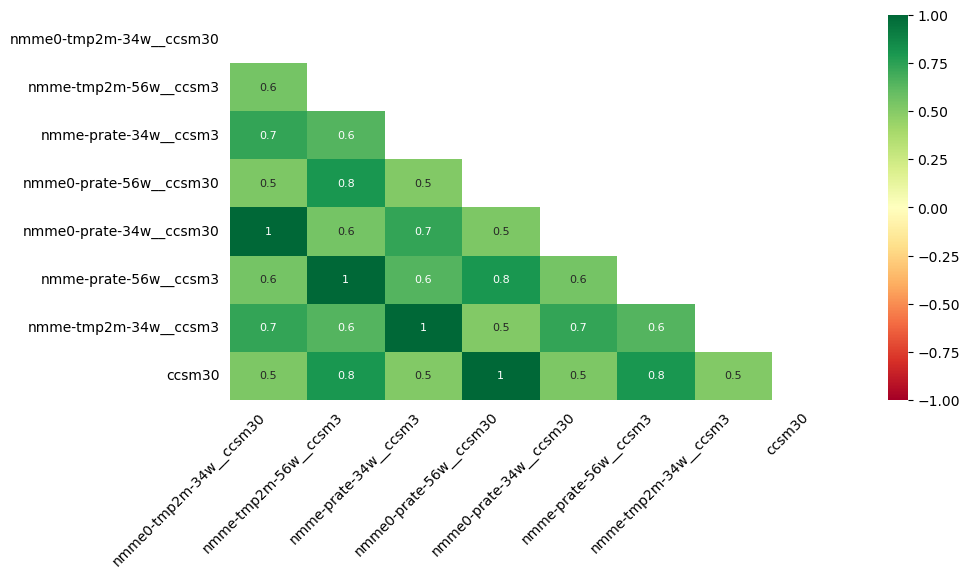

In [12]:
import missingno as msno
msno.heatmap(train, cmap="RdYlGn", figsize=(10,5), fontsize=10)

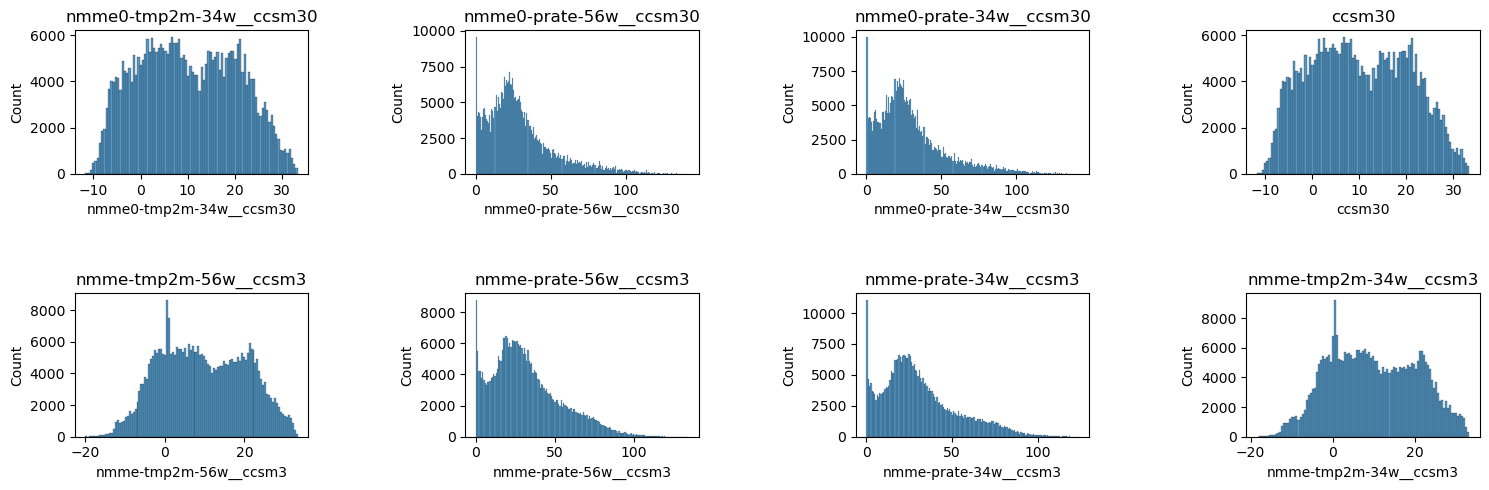

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,4, figsize=(15, 5))
ax = axes.flatten()
zero_list = ['nmme0-tmp2m-34w__ccsm30','nmme0-prate-56w__ccsm30', 'nmme0-prate-34w__ccsm30', 'ccsm30',
             'nmme-tmp2m-56w__ccsm3','nmme-prate-56w__ccsm3', 'nmme-prate-34w__ccsm3', 'nmme-tmp2m-34w__ccsm3']
for i, col in enumerate(zero_list):
    sns.histplot(train[col], ax=ax[i]) 
    ax[i].set_title(col)

    ax[i].ticklabel_format(style='plain', axis='both')

fig.tight_layout(w_pad=6, h_pad=4) 
plt.show()

In [14]:
train.fillna(method = 'ffill' , inplace = True)

In [15]:
train['contest-tmp2m-14d__tmp2m'].describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


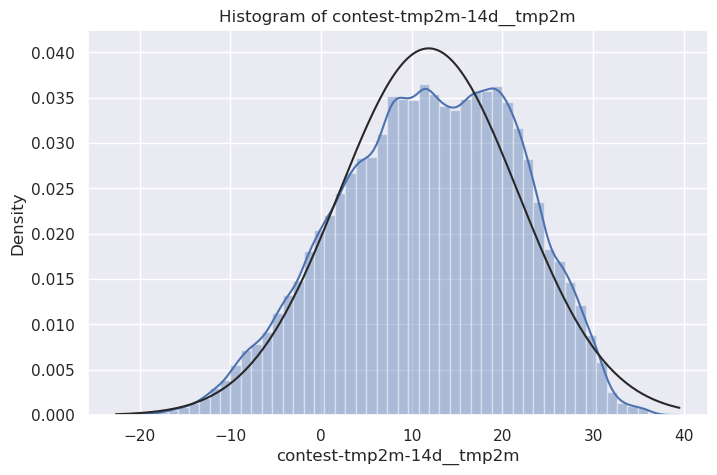

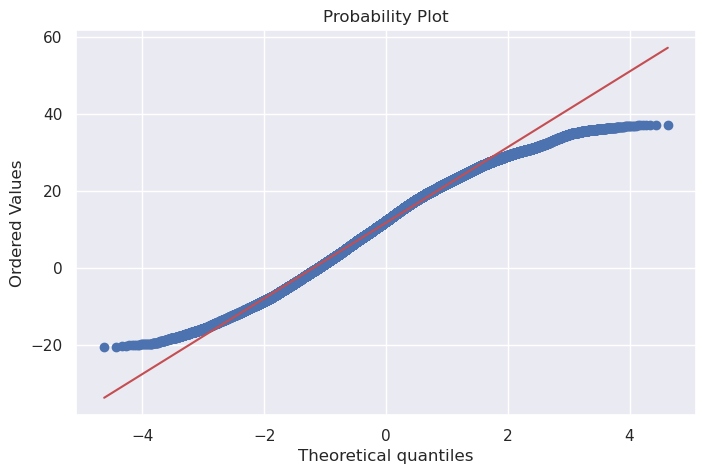

Skewness: -0.227591
Kurtosis: -0.517192


In [16]:
from scipy.stats import norm 
from scipy import stats
plt.figure(figsize=(8,5))
sns.set() # for style
sns.distplot(train['contest-tmp2m-14d__tmp2m'] , fit=norm)
plt.title("Histogram of contest-tmp2m-14d__tmp2m") # for histogram title
# probability plot
plt.figure(figsize=(8,5))
res = stats.probplot(train['contest-tmp2m-14d__tmp2m'], plot=plt)
plt.show()

# skewness and kurtosis
print("Skewness: %f" % train['contest-tmp2m-14d__tmp2m'].skew())
print("Kurtosis: %f" % train['contest-tmp2m-14d__tmp2m'].kurt())

# Exploratory Data Analysis

**Visualize Time-series Data**

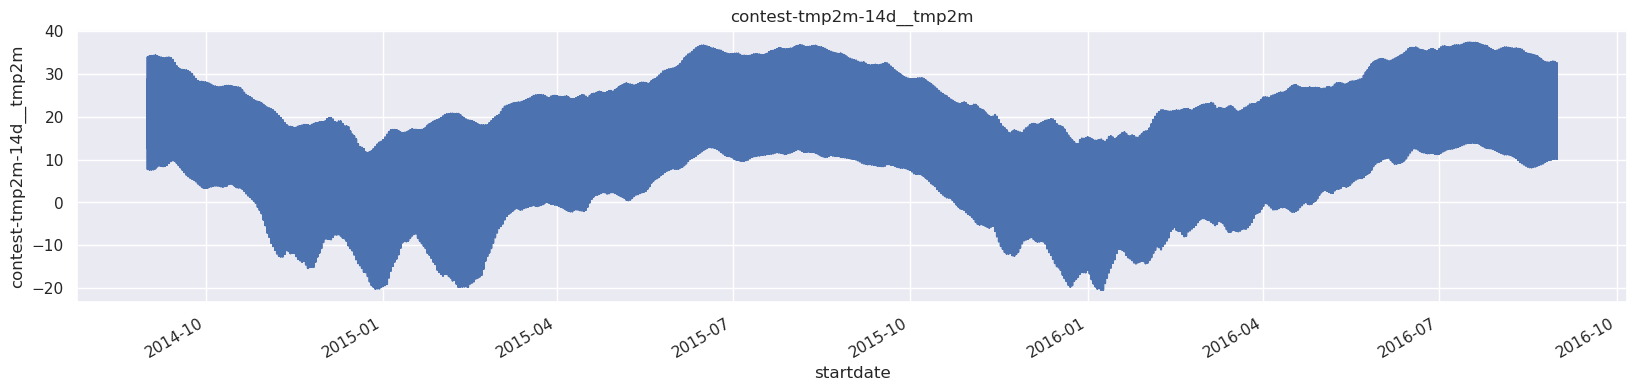

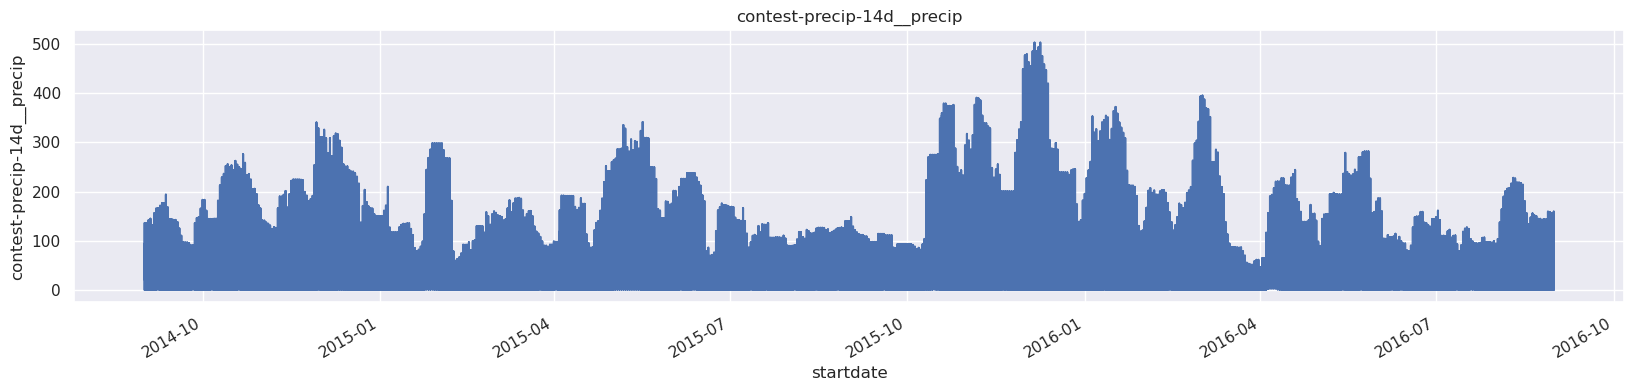

In [17]:
variables = list(train.columns)
for var in ['contest-tmp2m-14d__tmp2m', 'contest-precip-14d__precip']: 
    #plot the time series
    train[var].plot(figsize=(20,4))
    
    # add title
    plt.title(var)
    
    #the y axis lable
    plt.ylabel(var)
    
    plt.show()

**Seasonality - Temperature**

In [18]:
time_m = train.index.month
time_m =pd.Series(time_m, index=train.index)
time_y = train.index.year
time_y =pd.Series(time_y, index=train.index)

Text(0, 0.5, 'Temperature')

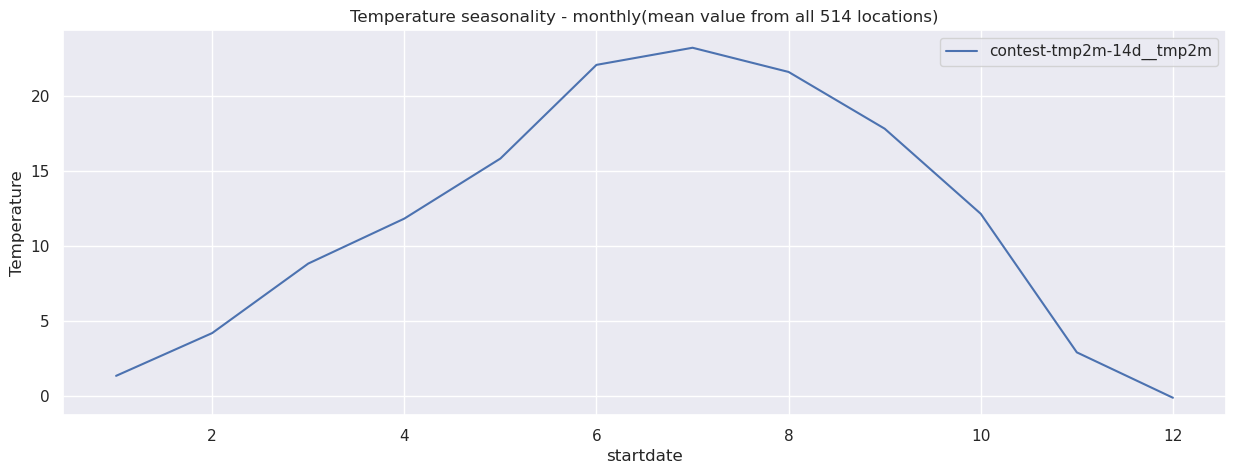

In [19]:
train.groupby(time_m)[['contest-tmp2m-14d__tmp2m']].mean().plot(figsize =(15,5))
plt.title("Temperature seasonality - monthly(mean value from all 514 locations)")
plt.ylabel("Temperature")

Text(0, 0.5, 'Temperature')

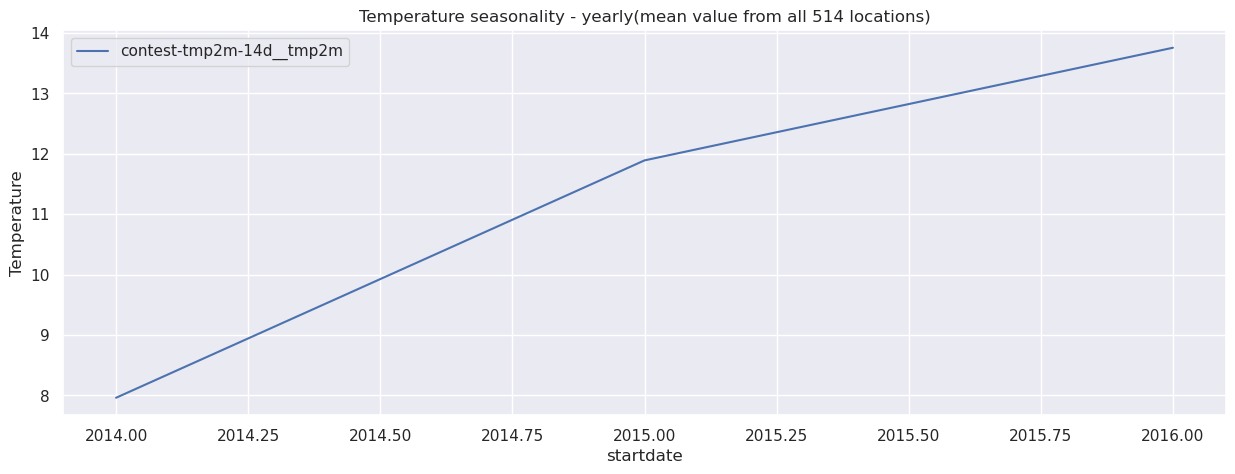

In [20]:
train.groupby(time_y)[['contest-tmp2m-14d__tmp2m']].mean().plot(figsize =(15,5))
plt.title("Temperature seasonality - yearly(mean value from all 514 locations)")
plt.ylabel("Temperature")

The mean temperature values are increasing between 2014 and 2015. It is nearly 6 degrees within 2 years!

# **Preprocess Data | Feature Engineering**

In [21]:
def categorical_encode(train, test):
    le = LabelEncoder()
    train['climateregions__climateregion'] = le.fit_transform(train['climateregions__climateregion'])
    test['climateregions__climateregion'] = le.transform(test['climateregions__climateregion'])
    return train, test

def feature_engineering(train_df, test_df):
    drop_cols = ['index', 'startdate', 'lat', 'lon','trunc_lat','trunc_lon','location', target]
    features = [col for col in train.columns if col not in drop_cols]
    X = train[features]
    X_test = test[features]
    y = train[target]

    return X, y, X_test

In [22]:
from sklearn.model_selection import train_test_split

X, y, X_test = feature_engineering(train.copy(), test.copy())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

print(f'Train_shape: {X_train.shape}    |   Val_shape: {X_val.shape}    |   Test_shape: {X_test.shape}')

Train_shape: (251741, 241)    |   Val_shape: (123993, 241)    |   Test_shape: (31354, 241)


# Install requirements

In [23]:
!pip install prophet

In [24]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [25]:
len(train)

375734

# Making predictions

In [26]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.